#Explorarando a base de dados de clientes cadastrados

In [ ]:
import pandas as pd

df_clientes_cadastrados = pd.read_csv('https://github.com/alura-cursos/Avaliacao_Credito/blob/main/dados/clientes_cadastrados.csv?raw=true')


df_clientes_cadastrados

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1000.7


In [ ]:
df_clientes_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438557 non-null  int64  
 1   Genero                 438557 non-null  object 
 2   Tem_Carro              438557 non-null  int64  
 3   Tem_Casa_Propria       438557 non-null  int64  
 4   Qtd_Filhos             438557 non-null  int64  
 5   Rendimento_Anual       438557 non-null  float64
 6   Categoria_de_renda     438557 non-null  object 
 7   Grau_Escolaridade      438557 non-null  object 
 8   Estado_Civil           438557 non-null  object 
 9   Moradia                438557 non-null  object 
 10  Idade                  438557 non-null  float64
 11  Tem_Celular            438557 non-null  int64  
 12  Tem_telefone_trabalho  438557 non-null  int64  
 13  Tem_telefone_fixo      438557 non-null  int64  
 14  Tem_email              438557 non-nu

In [ ]:
#Função para exibir clientes duplicados
def df_duplicado(df):
  
  df_contador_id = pd.DataFrame(df['ID_Cliente'].value_counts())

  duplicado = []
  for i in df_contador_id.index: 
    if df_contador_id.loc[i, 'ID_Cliente'] == 2: duplicado.append(i)

  df_duplicado = pd.DataFrame(columns=df_clientes_cadastrados.columns)
  for i in duplicado:
    df_duplicado = pd.concat([df_duplicado, df[df['ID_Cliente'] == i]])

  return df_duplicado

df_duplicado = df_duplicado(df_clientes_cadastrados)

df_duplicado

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
425235,7603224,H,1,1,0,540000.0,Associado comercial,Ensino medio,Casado,Casa propria,44.0,1,0,0,1,Gerencia,2.0,8.4
430187,7603224,M,0,0,0,47250.0,Pensionista,Ensino medio,Casado,Casa propria,60.0,1,0,0,0,Outros,2.0,-1000.7
423874,7742853,M,0,1,1,360000.0,Associado comercial,Ensino superior,Casado,Casa propria,32.0,1,0,1,0,Contabilidade,3.0,1.9
433159,7742853,H,0,1,0,157500.0,Empregado,Ensino medio,Solteiro,Casa propria,41.0,1,0,0,0,Construcao Civil,1.0,4.6
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429337,7743418,H,1,1,0,405000.0,Empregado,Ensino medio,Uniao estavel,Casa propria,49.0,1,0,1,0,Gerencia,2.0,4.3
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
423416,7772847,M,1,1,0,225000.0,Associado comercial,Ensino medio,Casado,Casa propria,41.0,1,0,1,0,Venda,2.0,4.5


In [ ]:
df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 421211 to 433789
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             94 non-null     int64  
 1   Genero                 94 non-null     object 
 2   Tem_Carro              94 non-null     int64  
 3   Tem_Casa_Propria       94 non-null     int64  
 4   Qtd_Filhos             94 non-null     int64  
 5   Rendimento_Anual       94 non-null     float64
 6   Categoria_de_renda     94 non-null     object 
 7   Grau_Escolaridade      94 non-null     object 
 8   Estado_Civil           94 non-null     object 
 9   Moradia                94 non-null     object 
 10  Idade                  94 non-null     float64
 11  Tem_Celular            94 non-null     int64  
 12  Tem_telefone_trabalho  94 non-null     int64  
 13  Tem_telefone_fixo      94 non-null     int64  
 14  Tem_email              94 non-null     int64  
 15 

In [ ]:
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']

id_repetidos

421211    7702516
421268    7602432
421349    7602432
421464    7836971
421698    7213374
           ...   
433158    7282535
433159    7742853
433217    7135270
433666    7091721
433789    7618285
Name: ID_Cliente, Length: 94, dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)

df_clientes_cadastrados_ID_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1000.7


In [ ]:
#Verificando que todas as linhas tem um id único

df_clientes_cadastrados_ID_unicos['ID_Cliente'].value_counts().value_counts()

1    438463
Name: ID_Cliente, dtype: int64

In [ ]:
#Verificando se exitem valores nulos no data frame

df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [ ]:
df_clientes_cadastrados_ID_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1000.7
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1000.7


In [ ]:
colunas_quantitativas = ['Qtd_Filhos','Rendimento_Anual','Idade','Tamanho_Familia','Anos_empregado']

colunas_quantitativas

['Qtd_Filhos',
 'Rendimento_Anual',
 'Idade',
 'Tamanho_Familia',
 'Anos_empregado']

In [ ]:
df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Qtd_Filhos,Rendimento_Anual,Idade,Tamanho_Familia,Anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000,438463.000000
mean,0.427384,1.875220e+05,43.834032,2.194461,-165.936036
std,0.724879,1.100832e+05,11.472815,0.897194,380.201131
min,0.000000,2.610000e+04,21.000000,1.000000,-1000.700000
25%,0.000000,1.215000e+05,34.000000,2.000000,1.000000
50%,0.000000,1.611000e+05,43.000000,2.000000,4.000000
75%,1.000000,2.250000e+05,53.000000,3.000000,8.500000
max,19.000000,6.750000e+06,69.000000,20.000000,48.000000


In [ ]:
#Verificar que tipo de resposta em Categoria_de_renda aparece quando o valor Anos_empregado é negativo

df_clientes_cadastrados_ID_unicos.query('Anos_empregado < 0')[['Anos_empregado','Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda
-1000.7         Pensionista           75314
dtype: int64

In [ ]:
#Verificar que tipo de resposta em Categoria_de_renda aparece quando o valor Anos_empregado é zero

df_clientes_cadastrados_ID_unicos.query('Anos_empregado == 0')[['Anos_empregado','Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
0.0             Empregado              26
                Servidor publico       11
                Associado comercial     7
dtype: int64

In [ ]:
#Verificar que tipo de resposta em Categoria_de_renda aparece quando o valor Anos_empregado é maior que zero

df_clientes_cadastrados_ID_unicos.query('Anos_empregado > 0')['Categoria_de_renda'].value_counts()

Empregado              226033
Associado comercial    100719
Servidor publico        36172
Pensionista               164
Estudante                  17
Name: Categoria_de_renda, dtype: int64

In [ ]:
#Remover o valor de -1000.7 do data frame

df_clientes_cadastrados_ID_unicos['Anos_empregado'] =  df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7, -1)

In [ ]:
#Verificando a alteração

df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Qtd_Filhos,Rendimento_Anual,Idade,Tamanho_Familia,Anos_empregado
count,438463.000000,4.384630e+05,438463.000000,438463.000000,438463.000000
mean,0.427384,1.875220e+05,43.834032,2.194461,5.780633
std,0.724879,1.100832e+05,11.472815,0.897194,6.733151
min,0.000000,2.610000e+04,21.000000,1.000000,-1.000000
25%,0.000000,1.215000e+05,34.000000,2.000000,1.000000
50%,0.000000,1.611000e+05,43.000000,2.000000,4.000000
75%,1.000000,2.250000e+05,53.000000,3.000000,8.500000
max,19.000000,6.750000e+06,69.000000,20.000000,48.000000


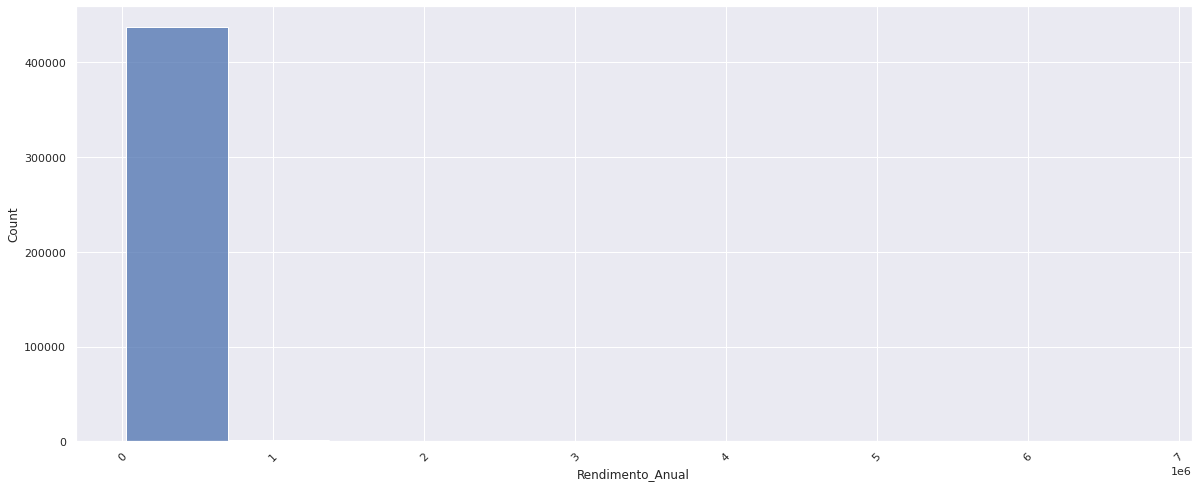

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(20,8))
sns.histplot(data=df_clientes_cadastrados_ID_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Tratando outliers em Rendimento_Anual

feature_med = df_clientes_cadastrados_ID_unicos['Rendimento_Anual'].mean()
feature_std = df_clientes_cadastrados_ID_unicos['Rendimento_Anual'].std()

#Utilizando método de intervalo de 4 sigmas:

limite_sup = feature_med + 2*feature_std
limite_inf = feature_med - 2*feature_std

index_outliers = []
for i in df_clientes_cadastrados_ID_unicos['Rendimento_Anual'].index:
  if df_clientes_cadastrados_ID_unicos.loc[i, 'Rendimento_Anual'] > limite_sup or df_clientes_cadastrados_ID_unicos.loc[i, 'Rendimento_Anual'] < limite_inf:
    index_outliers.append(i)

df_clientes_cadastrados_sem_outliers = df_clientes_cadastrados_ID_unicos.drop(index_outliers)

df_clientes_cadastrados_sem_outliers

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
5,5008810,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
6,5008811,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,1,0,0,0,Outros,1.0,-1.0
438553,6840222,M,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,1,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,M,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,1,0,0,Venda,1.0,1.0
438555,6842765,M,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Outros,2.0,-1.0


In [ ]:
df_clientes_cadastrados_sem_outliers[colunas_quantitativas].describe()

,Qtd_Filhos,Rendimento_Anual,Idade,Tamanho_Familia,Anos_empregado
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,0.425314,176384.728083,43.838707,2.191683,5.744956
std,0.723577,75033.530551,11.525400,0.896300,6.736649
min,0.000000,26100.000000,21.000000,1.000000,-1.000000
25%,0.000000,117000.000000,34.000000,2.000000,1.000000
50%,0.000000,157500.000000,43.000000,2.000000,4.000000
75%,1.000000,225000.000000,53.000000,3.000000,8.500000
max,19.000000,405000.000000,69.000000,20.000000,48.000000


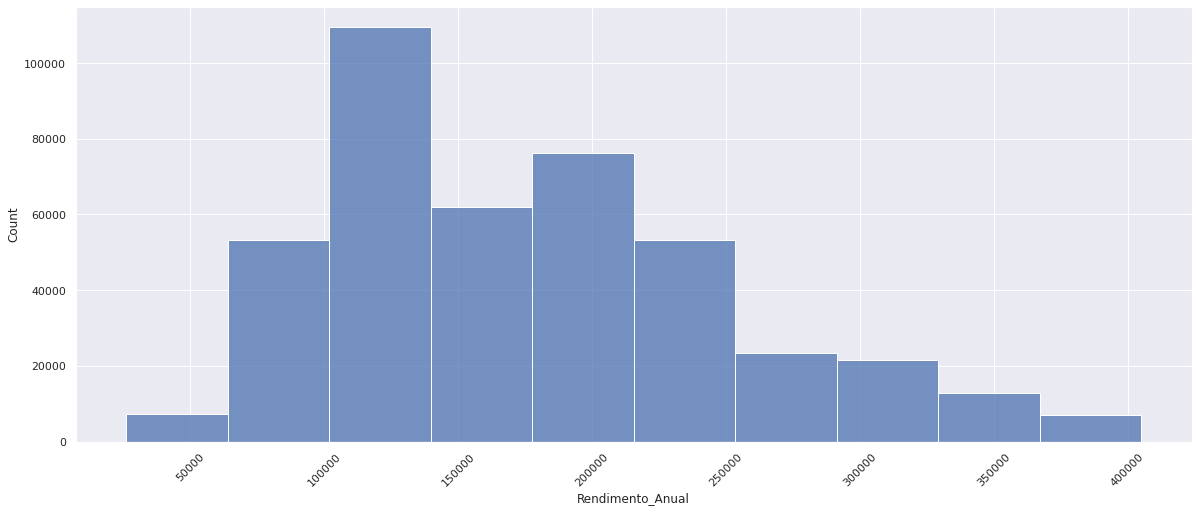

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

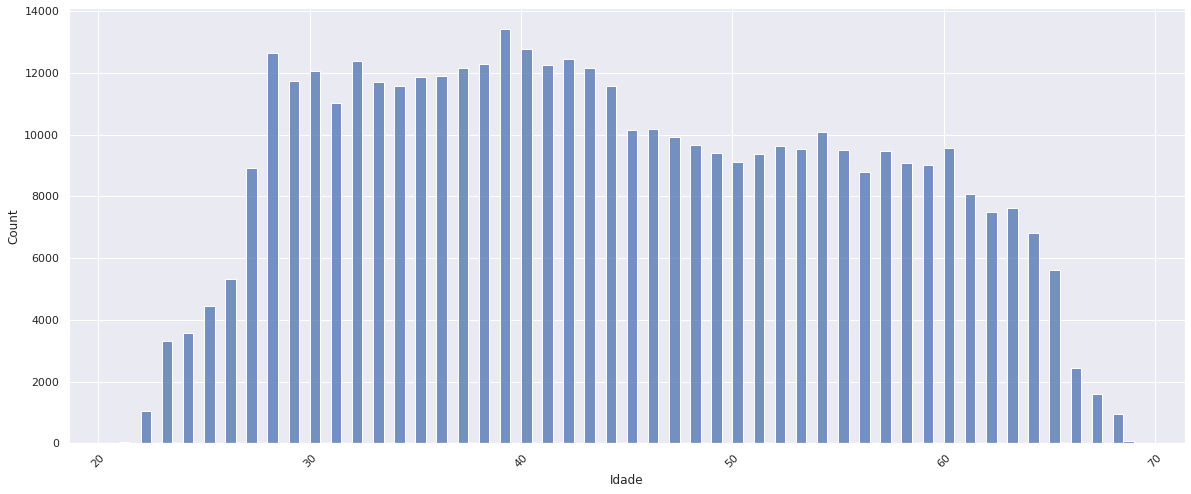

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df_clientes_cadastrados_sem_outliers, x='Idade')
plt.xticks(rotation=45)
plt.show()

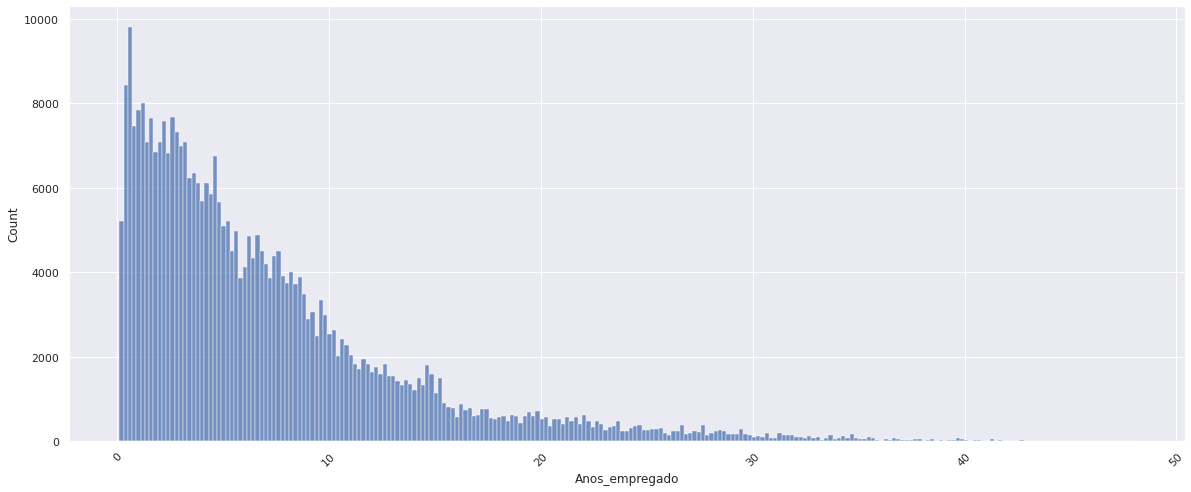

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Anos_empregado > 0"), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_clientes_cadastrados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425822 entries, 2 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             425822 non-null  int64  
 1   Genero                 425822 non-null  object 
 2   Tem_Carro              425822 non-null  int64  
 3   Tem_Casa_Propria       425822 non-null  int64  
 4   Qtd_Filhos             425822 non-null  int64  
 5   Rendimento_Anual       425822 non-null  float64
 6   Categoria_de_renda     425822 non-null  object 
 7   Grau_Escolaridade      425822 non-null  object 
 8   Estado_Civil           425822 non-null  object 
 9   Moradia                425822 non-null  object 
 10  Idade                  425822 non-null  float64
 11  Tem_Celular            425822 non-null  int64  
 12  Tem_telefone_trabalho  425822 non-null  int64  
 13  Tem_telefone_fixo      425822 non-null  int64  
 14  Tem_email              425822 non-nu

In [ ]:
colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria', 'Categoria_de_renda', 'Grau_Escolaridade', 
                       'Estado_Civil', 'Moradia', 'Tem_Celular', 'Tem_telefone_trabalho', 'Tem_telefone_fixo', 
                       'Tem_email', 'Ocupacao']
                       
colunas_categoricas

['Genero',
 'Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_Celular',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

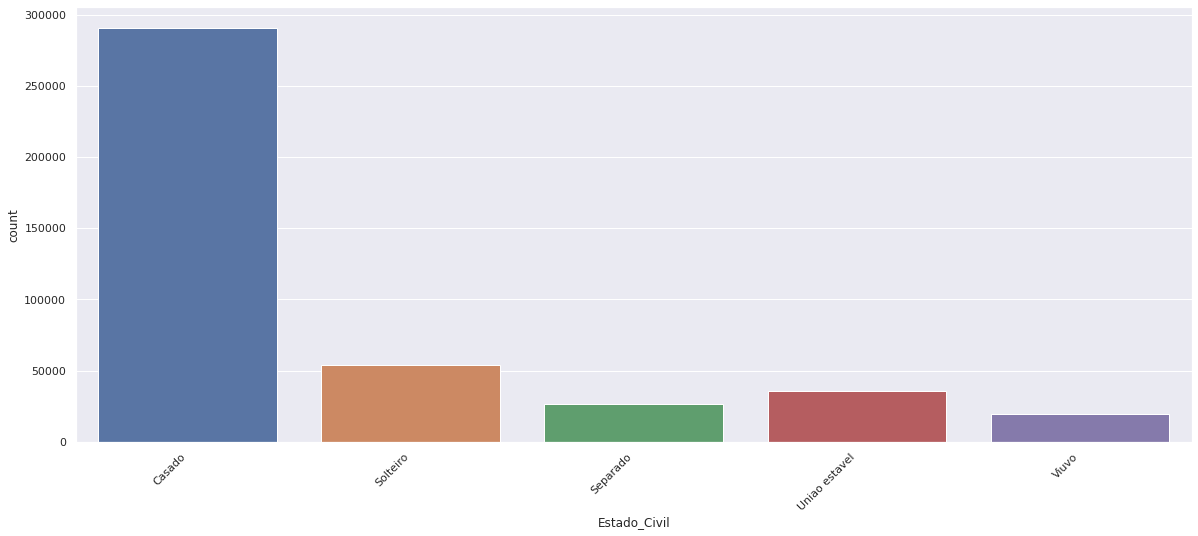

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_clientes_cadastrados_sem_outliers, x='Estado_Civil')
plt.xticks(rotation=45, ha='right')
plt.show()

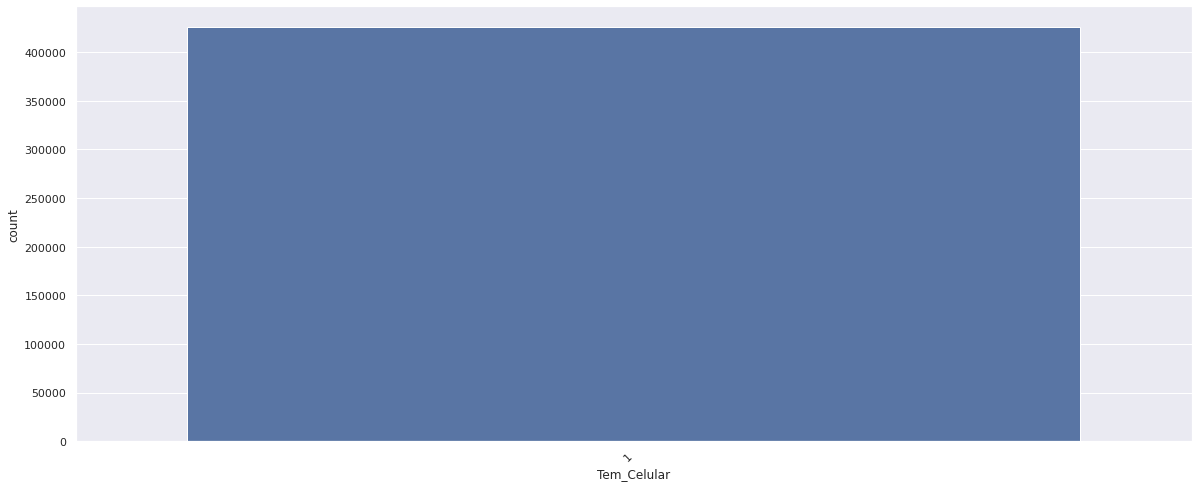

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_clientes_cadastrados_sem_outliers, x='Tem_Celular')
plt.xticks(rotation=45, ha='right')
plt.show()

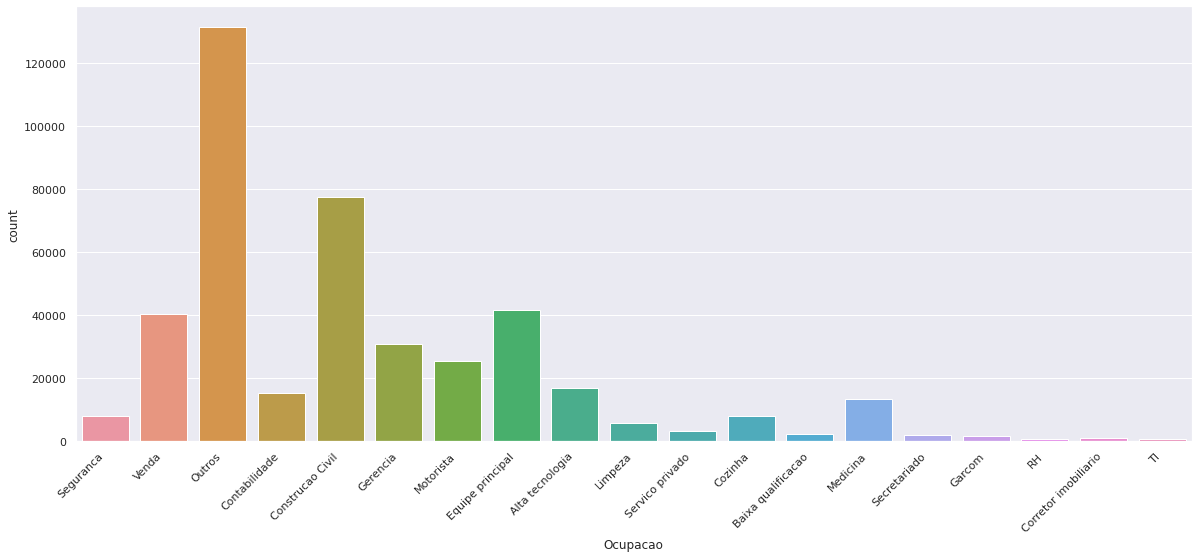

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=df_clientes_cadastrados_sem_outliers, x='Ocupacao')
plt.xticks(rotation=45, ha='right')
plt.show()

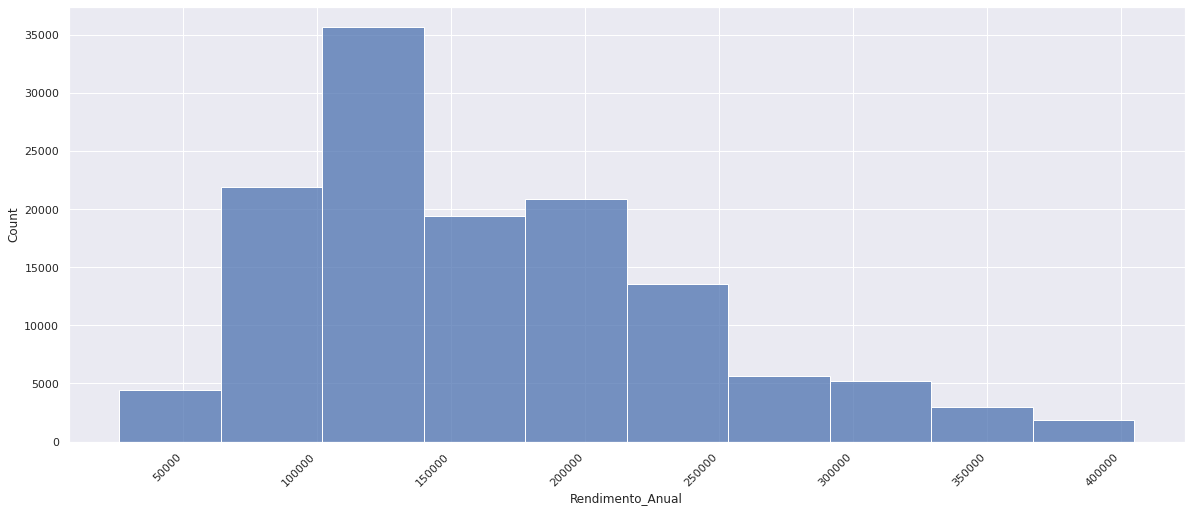

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df_clientes_cadastrados_sem_outliers.query("Ocupacao == 'Outros'"), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df_clientes_cadastrados_tratamento = df_clientes_cadastrados_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)

df_clientes_cadastrados_tratamento

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
2,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1
3,5008808,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
4,5008809,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
5,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
6,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,0,1,0,135000.0,Pensionista,Ensino medio,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0
438553,6840222,0,0,0,103500.0,Empregado,Ensino medio,Solteiro,Casa propria,44.0,0,0,0,Construcao Civil,1.0,8.2
438554,6841878,0,0,0,54000.0,Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.0,1,0,0,Venda,1.0,1.0
438555,6842765,0,1,0,72000.0,Pensionista,Ensino medio,Casado,Casa propria,59.0,0,0,0,Outros,2.0,-1.0


In [ ]:
colunas_categoricas.remove('Genero')
colunas_categoricas.remove('Tem_Celular')

colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

#Explorando a base de dados de clientes aprovados

In [ ]:
df_clientes_aprovados = pd.read_csv('https://github.com/alura-cursos/Avaliacao_Credito/blob/main/dados/clientes_aprovados.csv?raw=true')

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado
...,...,...,...
1048570,5150487,-25,pagamento realizado
1048571,5150487,-26,pagamento realizado
1048572,5150487,-27,pagamento realizado
1048573,5150487,-28,pagamento realizado


In [ ]:
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_clientes_aprovados['ID_Cliente'].value_counts()

5145767    61
5116236    61
5037153    61
5002523    61
5028973    61
           ..
5149044     1
5079047     1
5137258     1
5023604     1
5023029     1
Name: ID_Cliente, Length: 45985, dtype: int64

In [ ]:
df_clientes_aprovados.query("ID_Cliente == 5001712")

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [ ]:
df_clientes_aprovados['Faixa_atraso'].value_counts()

pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: Faixa_atraso, dtype: int64

In [ ]:
series_abertura = df_clientes_aprovados.groupby('ID_Cliente')['Mes_referencia'].min()
series_abertura.name = "Abertura"

series_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

In [ ]:
df_clientes_aprovados = df_clientes_aprovados.merge(series_abertura, on='ID_Cliente')

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18
...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29
1048571,5150487,-26,pagamento realizado,-29
1048572,5150487,-27,pagamento realizado,-29
1048573,5150487,-28,pagamento realizado,-29


In [ ]:
series_final = df_clientes_aprovados.groupby('ID_Cliente')['Mes_referencia'].max()
series_final.name = "Final"

series_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [ ]:
df_clientes_aprovados = df_clientes_aprovados.merge(series_final, on='ID_Cliente')

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0
...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0
1048571,5150487,-26,pagamento realizado,-29,0
1048572,5150487,-27,pagamento realizado,-29,0
1048573,5150487,-28,pagamento realizado,-29,0


In [ ]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18
...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29
1048571,5150487,-26,pagamento realizado,-29,0,29
1048572,5150487,-27,pagamento realizado,-29,0,29
1048573,5150487,-28,pagamento realizado,-29,0,29


In [ ]:
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18
...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4
1048571,5150487,-26,pagamento realizado,-29,0,29,3
1048572,5150487,-27,pagamento realizado,-29,0,29,2
1048573,5150487,-28,pagamento realizado,-29,0,29,1


In [ ]:
df_clientes_aprovados['Faixa_atraso'].value_counts()

pagamento realizado    442031
1-29 dias              383120
nenhum empréstimo      209230
30-59 dias              11090
>150 dias                1693
60-89 dias                868
90-119 dias               320
120-149 dias              223
Name: Faixa_atraso, dtype: int64

In [ ]:
dict_faixa_atraso_indice = {'nenhum empréstimo': 0,
                            'pagamento realizado': 1,
                            '1-29 dias': 2,
                            '30-59 dias': 3,
                            '60-89 dias': 4,
                            '90-119 dias': 5,
                            '120-149 dias': 6,
                            '>150 dias': 7}

dict_faixa_atraso_indice

{'1-29 dias': 2,
 '120-149 dias': 6,
 '30-59 dias': 3,
 '60-89 dias': 4,
 '90-119 dias': 5,
 '>150 dias': 7,
 'nenhum empréstimo': 0,
 'pagamento realizado': 1}

In [ ]:
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_indice)

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1
...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1


In [ ]:
df_clientes_aprovados['Mau_Pagador'] = 0

for i in df_clientes_aprovados.index:
  if df_clientes_aprovados.loc[i, 'Ind_Faixa_atraso'] > 3: df_clientes_aprovados.loc[i, 'Mau_Pagador'] = 1

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau_Pagador
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0
...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1,0
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1,0
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1,0
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1,0


In [ ]:
df_registro_creditos_ID = df_clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').head(1).reset_index(drop=True)

df_registro_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [ ]:
df_denominador = df_registro_creditos_ID['Abertura'].value_counts().sort_index().reset_index()
df_denominador.columns = ['Abertura', 'Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [ ]:
df_vintage = df_clientes_aprovados[['Abertura', 'MOB']].value_counts().sort_index().reset_index()
df_vintage.columns = ['Abertura', 'MOB', 'Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [ ]:
df_vintage = pd.merge(df_vintage[['Abertura', 'MOB']], df_denominador, on=['Abertura'], how='left')

df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [ ]:
import numpy as np

df_vintage['Qtd_Mau_Pagador'] = 0
for i in range(-60,1):
  ls = []
  for j in range(0,61):
    due = list(df_clientes_aprovados.query('Mau_Pagador == 1 and MOB == @j and Abertura == @i')['ID_Cliente'])
    ls.extend(due)
    df_vintage.loc[(df_vintage['Abertura'] == i) & (df_vintage['MOB'] == j), 'Qtd_Mau_Pagador'] = len(set(ls))

df_vintage['Taxa_de_Mau'] = df_vintage['Qtd_Mau_Pagador']/df_vintage['Qtd_Clientes']

df_vintage

,Abertura,MOB,Qtd_Clientes,Qtd_Mau_Pagador,Taxa_de_Mau
0,-60,0,415,0,0.000000
1,-60,1,415,0,0.000000
2,-60,2,415,0,0.000000
3,-60,3,415,0,0.000000
4,-60,4,415,0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0,0.000000
1887,-2,2,771,1,0.001297
1888,-1,0,686,0,0.000000
1889,-1,1,686,0,0.000000


In [ ]:
df_vintage_pivot = df_vintage.pivot(index='Abertura',
                                    columns = 'MOB',
                                    values = 'Taxa_de_Mau')

df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


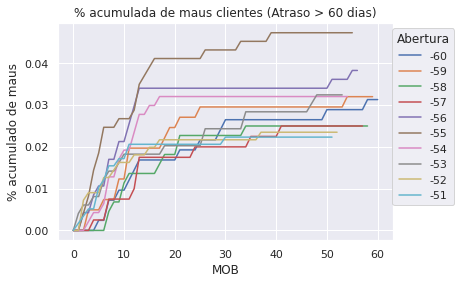

In [ ]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulada de maus clientes (Atraso > 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title = 'Abertura')
plt.show()

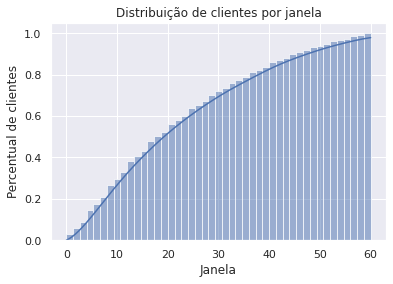

In [ ]:
sns.histplot(data=df_registro_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

In [ ]:
dict_intervalo_atraso = {'maior_30_dias': 3,
                         'maior_60_dias': 4,
                         'maior_90_dias': 5,
                         'maior_120_dias': 6,
                         'maior_150_dias': 7}

for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1)

df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau_Pagador,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1,0,0,0,0,0,0
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1,0,0,0,0,0,0
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1,0,0,0,0,0,0
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1,0,0,0,0,0,0


In [ ]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB': range(0,61), 'Taxa_Mau' : np.nan})
  lst = []
  for i in range(0,61):
    due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
    lst.extend(due)
    df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst))/id_sum
  
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau


,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


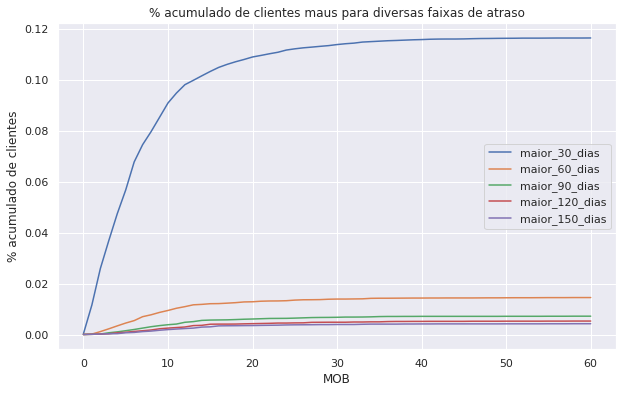

In [ ]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

In [ ]:
df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').head(1)

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau_Pagador,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0
23,5001713,0,nenhum empréstimo,-21,0,21,21,0,0,0,0,0,0,0
45,5001714,0,nenhum empréstimo,-14,0,14,14,0,0,0,0,0,0,0
60,5001715,0,nenhum empréstimo,-59,0,59,59,0,0,0,0,0,0,0
120,5001717,0,pagamento realizado,-21,0,21,21,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048451,5150481,0,nenhum empréstimo,-42,0,42,42,0,0,0,0,0,0,0
1048494,5150482,-11,pagamento realizado,-28,-11,17,17,1,0,0,0,0,0,0
1048512,5150483,0,nenhum empréstimo,-17,0,17,17,0,0,0,0,0,0,0
1048530,5150484,0,pagamento realizado,-12,0,12,12,1,0,0,0,0,0,0


In [ ]:
df_clientes_aprovados_tratamento_1 = df_clientes_aprovados.query('Janela >=12').copy()

df_clientes_aprovados_tratamento_1

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau_Pagador,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0
5,5001712,-1,pagamento realizado,-18,0,18,17,1,0,0,0,0,0,0
6,5001712,-2,pagamento realizado,-18,0,18,16,1,0,0,0,0,0,0
7,5001712,-3,pagamento realizado,-18,0,18,15,1,0,0,0,0,0,0
8,5001712,-4,pagamento realizado,-18,0,18,14,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1,0,0,0,0,0,0
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1,0,0,0,0,0,0
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1,0,0,0,0,0,0
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1,0,0,0,0,0,0


In [ ]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento_1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0
...,...,...
30913,5150481,0
30914,5150482,0
30915,5150483,0
30916,5150484,0


In [ ]:
df_registro_clientes_target = df_clientes_cadastrados_tratamento.merge(df_registros_creditos_id, on='ID_Cliente')

df_registro_clientes_target

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,5149729,1,1,0,90000.0,Empregado,Ensino medio,Casado,Casa propria,52.0,0,0,0,Outros,2.0,4.7,1
22738,5149775,1,1,0,130500.0,Empregado,Ensino medio,Casado,Casa propria,44.0,0,1,0,Construcao Civil,2.0,25.7,1
22739,5149834,0,1,0,157500.0,Associado comercial,Ensino superior,Casado,Casa propria,34.0,0,1,1,Medicina,2.0,3.6,1
22740,5149838,0,1,0,157500.0,Pensionista,Ensino superior,Casado,Casa propria,34.0,0,1,1,Medicina,2.0,3.6,1


In [ ]:
df_registro_clientes_target['Mau'].value_counts(normalize=True)

0    0.977267
1    0.022733
Name: Mau, dtype: float64

In [ ]:
colunas_categoricas_binarias = ['Tem_Carro',
                                'Tem_Casa_Propria',
                                'Tem_telefone_trabalho',
                                'Tem_telefone_fixo',
                                'Tem_email']

colunas_categoricas_binarias

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email']

In [ ]:
colunas_categoricas_nao_binarias = ['Categoria_de_renda',
                                    'Grau_Escolaridade',
                                    'Estado_Civil',
                                    'Moradia',
                                    'Ocupacao']

colunas_categoricas_nao_binarias

['Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Ocupacao']

In [ ]:
df_registro_clientes_target = df_registro_clientes_target[['ID_Cliente'] + colunas_quantitativas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_target

,ID_Cliente,Qtd_Filhos,Rendimento_Anual,Idade,Tamanho_Familia,Anos_empregado,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,0,112500.0,59.0,2.0,3.1,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,0,270000.0,52.0,1.0,8.4,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,0,270000.0,52.0,1.0,8.4,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,0,283500.0,62.0,1.0,-1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,0,283500.0,62.0,1.0,-1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,5149729,0,90000.0,52.0,2.0,4.7,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Outros,1
22738,5149775,0,130500.0,44.0,2.0,25.7,1,1,0,1,0,Empregado,Ensino medio,Casado,Casa propria,Construcao Civil,1
22739,5149834,0,157500.0,34.0,2.0,3.6,0,1,0,1,1,Associado comercial,Ensino superior,Casado,Casa propria,Medicina,1
22740,5149838,0,157500.0,34.0,2.0,3.6,0,1,0,1,1,Pensionista,Ensino superior,Casado,Casa propria,Medicina,1


#Aplicando machine learning

In [ ]:
#Garantindo compatibilidade das versões e módulos

#!pip install scikit-learn==0.23.2 imbalanced-lean==0.7.0

#import six
#import sys
#sys.modules['sklearn.externals.six'] = six

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix

from scipy import stats

seed = 1561651
def roda_modelo(modelo, dados):

  #Separando dados em X e y, e também removendo a coluna de ID_Cliente
  X = dados.drop(['ID_Cliente', 'Mau'], axis=1)
  y = dados['Mau']

  #Separando dados em treino e teste
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)

  #Treinando modelo com os dados de treino
  modelo.fit(X_train, y_train)

  #Calculando a probabilidade e o AUC
  prob_predic = modelo.predict_proba(X_test)
  auc = roc_auc_score(y_test, prob_predic[:,1])
  print(f"AUC: {auc}")

  #Separando a probabilidade de ser bom ou mau, e calculando o KS
  data_bom = np.sort(modelo.predict_proba(X_test)[:,1])
  data_mau = np.sort(modelo.predict_proba(X_test)[:,0])
  kstest = stats.ks_2samp(data_bom, data_mau)
  print(f"KS: {kstest}")

  #Criando matriz de confusão
  matriz_confusao = plot_confusion_matrix(modelo, X_test, y_test, values_format='.0f', display_labels=['Bons', 'Maus'])
  plt.grid(False)
  plt.show(matriz_confusao)

  #Fazendo a predição dos dados de teste e calculando o Classfication Report
  predicao = modelo.predict(X_test)
  print("\nClassification Report:")
  print(classification_report(y_test, predicao, zero_division=0))

In [ ]:
#Realizando pré-processamento dos dados

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin

# PEP8 padrão CamelCase
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self 

    def transform(self, X, y = None):
      
      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names(self.colunas_categoricas))
      
      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)
      
      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

AUC: 0.5
KS: Ks_2sampResult(statistic=1.0, pvalue=0.0)


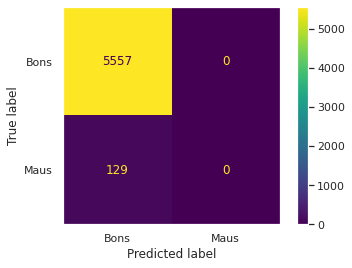


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', DummyClassifier(strategy='prior'))])   
roda_modelo(pipeline, df_registro_clientes_target)

AUC: 0.5847237857691884
KS: Ks_2sampResult(statistic=1.0, pvalue=0.0)


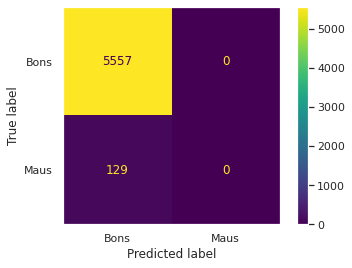


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5557
           1       0.00      0.00      0.00       129

    accuracy                           0.98      5686
   macro avg       0.49      0.50      0.49      5686
weighted avg       0.96      0.98      0.97      5686



In [ ]:
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=seed, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_target)

#Tratando desbalanceamento:

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AUC: 0.5816408663979924
KS: Ks_2sampResult(statistic=0.12926486106225818, pvalue=8.449404974877798e-42)


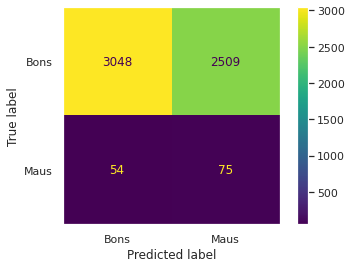


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.55      0.70      5557
           1       0.03      0.58      0.06       129

    accuracy                           0.55      5686
   macro avg       0.51      0.56      0.38      5686
weighted avg       0.96      0.55      0.69      5686



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Sampling', SMOTE(random_state=seed)),
                     ('Modelo', LogisticRegression(random_state=seed, max_iter=1000))])   
roda_modelo(pipeline, df_registro_clientes_target)


AUC: 0.8283016183234219
KS: Ks_2sampResult(statistic=0.9792472740063314, pvalue=0.0)


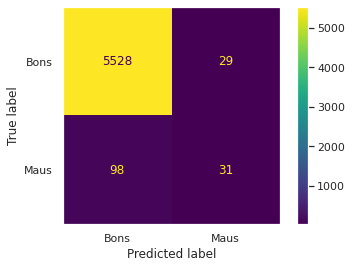


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5557
           1       0.52      0.24      0.33       129

    accuracy                           0.98      5686
   macro avg       0.75      0.62      0.66      5686
weighted avg       0.97      0.98      0.97      5686



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Utilizando random forest sem SMOTE
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Modelo', RandomForestClassifier(random_state=seed))])   
roda_modelo(pipeline, df_registro_clientes_target)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


AUC: 0.8355136966714236
KS: Ks_2sampResult(statistic=0.9651776292648611, pvalue=0.0)


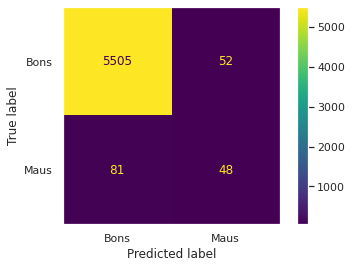


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5557
           1       0.48      0.37      0.42       129

    accuracy                           0.98      5686
   macro avg       0.73      0.68      0.70      5686
weighted avg       0.97      0.98      0.98      5686



In [ ]:
#Utilizando random forest e SMOTE
pipeline = Pipeline([('Transformador', Transformador(colunas_quantitativas, colunas_categoricas)),
                     ('Sampling', SMOTE(random_state=seed)),
                     ('Modelo', RandomForestClassifier(random_state=seed))])   
roda_modelo(pipeline, df_registro_clientes_target)

In [ ]:
X = df_registro_clientes_target.drop(['ID_Cliente','Mau'], axis=1)
y = df_registro_clientes_target['Mau']

pipeline.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('Transformador',
                 Transformador(colunas_categoricas=['Tem_Carro',
                                                    'Tem_Casa_Propria',
                                                    'Categoria_de_renda',
                                                    'Grau_Escolaridade',
                                                    'Estado_Civil', 'Moradia',
                                                    'Tem_telefone_trabalho',
                                                    'Tem_telefone_fixo',
                                                    'Tem_email', 'Ocupacao'],
                               colunas_continuas=['Qtd_Filhos',
                                                  'Rendimento_Anual', 'Idade',
                                                  'Tamanho_Familia',
                                                  'Anos_empregado'])),
                ('Sampli...
                 RandomForestClassifier(bo

In [ ]:
X

,Qtd_Filhos,Rendimento_Anual,Idade,Tamanho_Familia,Anos_empregado,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao
0,0,112500.0,59.0,2.0,3.1,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca
1,0,270000.0,52.0,1.0,8.4,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda
2,0,270000.0,52.0,1.0,8.4,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda
3,0,283500.0,62.0,1.0,-1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros
4,0,283500.0,62.0,1.0,-1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22737,0,90000.0,52.0,2.0,4.7,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Outros
22738,0,130500.0,44.0,2.0,25.7,1,1,0,1,0,Empregado,Ensino medio,Casado,Casa propria,Construcao Civil
22739,0,157500.0,34.0,2.0,3.6,0,1,0,1,1,Associado comercial,Ensino superior,Casado,Casa propria,Medicina
22740,0,157500.0,34.0,2.0,3.6,0,1,0,1,1,Pensionista,Ensino superior,Casado,Casa propria,Medicina


In [ ]:
from joblib import dump

dump(pipeline, 'modelo.joblib')

['modelo.joblib']

In [ ]:
features = X.columns

dump(features, 'features.joblib')

['features.joblib']

In [ ]:
lista_campos = df_registro_clientes_target[colunas_categoricas_nao_binarias].apply(lambda x: x.unique(), axis=0)

lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [ ]:
dump(lista_campos, 'lista_campos.joblib')

['lista_campos.joblib']

In [ ]:
lista_campos

Categoria_de_renda    [Empregado, Associado comercial, Pensionista, ...
Grau_Escolaridade     [Ensino medio, Ensino superior, Ensino superio...
Estado_Civil          [Casado, Solteiro, Separado, Uniao estavel, Vi...
Moradia               [Casa propria, Alugado, Habitacao publica, Mor...
Ocupacao              [Seguranca, Venda, Outros, Contabilidade, Cons...
dtype: object

In [ ]:
type(lista_campos)

pandas.core.series.Series